python version 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
TF version 2.14.0
GPU available
(60000, 28, 28) (10000, 28, 28)
(3000, 28, 28, 1) (30000, 28, 28, 1)
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_233 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_167 (MaxPool  (None, 14, 14, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_234 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_168 (MaxPool  (None, 7, 7, 64)          0         
 ing2D)                                                          
                                                                 
 conv2d_235 (Conv2

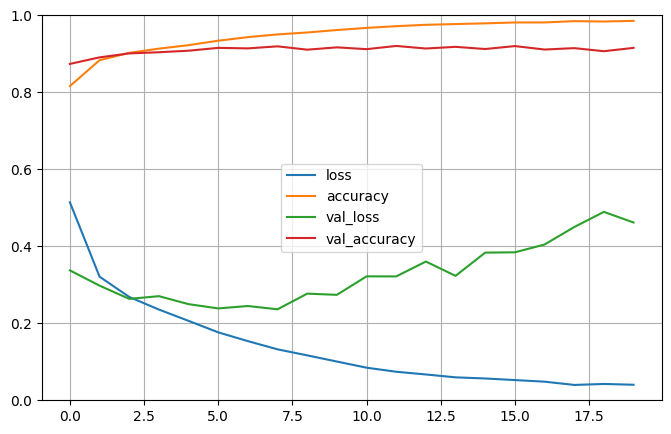

313/313 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.9138
91.38000011444092
896906
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_236 (Conv2D)         (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_130 (B  (None, 28, 28, 16)        64        
 atchNormalization)                                              
                                                                 
 dropout_164 (Dropout)       (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_169 (MaxPool  (None, 14, 14, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_237 (Conv2D)         (None, 14, 14, 32)        4640      
     

In [38]:
# -*- coding: utf-8 -*-
"""과제3_CNN 공개본

"""

#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
from tensorflow import keras
import random
import os
import numpy as np

os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
### 매우 중요 22.12.07       ####################
### 특정 TF 버전에서 작동 안하는 모듈이 존재할 수 있음.
### 아래 코드를 추가하고 에러가 나는 경우, 해당 모듈(또는 해당 코드 또는 기능)을 제외시켜야 함
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import sys
print("python version", sys.version)
print("TF version", tf.__version__)
if tf.test.is_gpu_available():
  print("GPU available")
else:
  print("GPU unavailable")


# load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_test.shape)

# Valid set: ~3,000, Train set: 30,000
X_valid, X_train = X_train_full[:3000] / 255., X_train_full[30000:] / 255.  # do not change
y_valid, y_train = y_train_full[:3000], y_train_full[30000:]  # do not change
X_test = X_test / 255.  # do not change

# do not change
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_valid.shape, X_train.shape)
# do not change

from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
# do not change
model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='softmax'),
])
# do not change
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()
# do not change

history = model.fit(X_train, y_train, epochs=20,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
# do not change
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

org_acc = model.evaluate(X_test, y_test)  # do not change
print(org_acc[1]*100)

from keras import backend as K

org_model_size = np.sum([K.count_params(w) for w in model.trainable_weights]) # do not change
print(org_model_size)

# original FashionMNIST input shape is [28,28,1]
# if needed, data augmentation can be done here
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
from keras.models import Model, load_model

# ★★★★★ # preprocessing if applicable
your_model = keras.models.Sequential([
    DefaultConv2D(filters=16, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=2),


    DefaultConv2D(filters=32),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    #keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.AveragePooling2D(pool_size=2),


    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    #keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.AveragePooling2D(pool_size=2),

    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    # keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.AveragePooling2D(pool_size=2),

    DefaultConv2D(filters=256),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.GlobalAveragePooling2D(),
    #keras.layers.GlobalMaxPooling2D(),
    #keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=10, activation='softmax'),
])
your_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=["accuracy"])
your_model.summary()
your_model_size = np.sum([K.count_params(w) for w in your_model.trainable_weights])

hist=your_model.fit(X_train, y_train, epochs=80,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))

yours=your_model.evaluate(X_test, y_test)

print("[Acc] performance improvement: %.2f percent" % (yours[1]*100 - org_acc[1]*100))
print("[Size] size ratio: %.2f percent" % ((your_model_size / org_model_size)*100) )
if (yours[1]*100 - org_acc[1]*100) > 0:
  print("Accuracy resolved")
if (your_model_size / org_model_size)*100 < 70:
  print("Size resolved")